In [1]:
import os
import json
import platform
import getpass
from datetime import datetime
OUTPUT_DIR = r"G:\Acetylchonline\数据补充\3 光纤数据\Chat-cre DIO-GCaMP\Complex treadmill\20241211\2024121110\results"
INPUT_FILE = r"G:\Acetylchonline\数据补充\3 光纤数据\Chat-cre DIO-GCaMP\Complex treadmill\20241211\2024121110\615_day2DLC_resnet101_CINJan4shuffle1_500000.csv"
os.makedirs(OUTPUT_DIR, exist_ok=True)
metadata = {
    "input_file_path": INPUT_FILE,
    "output_directory": OUTPUT_DIR,
    "created_utc": datetime.utcnow().isoformat() + "Z",
    "local_user": getpass.getuser(),
    "machine": platform.node(),
    "system": platform.system(),
    "release": platform.release(),
    "platform_version": platform.version(),
    "architecture": platform.machine(),
    "python_version": platform.python_version(),
    "notes": (
        "STEP 0: This metadata file records the environment and file paths "
        "for the gait & syllable analysis pipeline. "
        "Run this cell once at the beginning of every session."
    )
}
metadata_path = os.path.join(OUTPUT_DIR, "metadata_read_and_header.json")
with open(metadata_path, "w", encoding="utf-8") as f:
    json.dump(metadata, f, indent=4)
print("STEP 0 completed successfully.")
print(f"Metadata saved to: {metadata_path}")
print("\nMetadata contents:")
for k, v in metadata.items():
    print(f"  {k}: {v}")

STEP 0 completed successfully.
Metadata saved to: G:\Acetylchonline\数据补充\3 光纤数据\Chat-cre DIO-GCaMP\Complex treadmill\20241211\2024121110\results\metadata_read_and_header.json

Metadata contents:
  input_file_path: G:\Acetylchonline\数据补充\3 光纤数据\Chat-cre DIO-GCaMP\Complex treadmill\20241211\2024121110\615_day2DLC_resnet101_CINJan4shuffle1_500000.csv
  output_directory: G:\Acetylchonline\数据补充\3 光纤数据\Chat-cre DIO-GCaMP\Complex treadmill\20241211\2024121110\results
  created_utc: 2025-10-29T09:09:53.212694Z
  local_user: Pulee
  machine: LAPTOP-Pulee
  system: Windows
  release: 10
  platform_version: 10.0.26200
  architecture: AMD64
  python_version: 3.10.18
  notes: STEP 0: This metadata file records the environment and file paths for the gait & syllable analysis pipeline. Run this cell once at the beginning of every session.


In [2]:
import pandas as pd
import json
import os

INPUT_FILE = r"G:\Acetylchonline\数据补充\3 光纤数据\Chat-cre DIO-GCaMP\Complex treadmill\20241211\2024121110\615_day2DLC_resnet101_CINJan4shuffle1_500000.csv"
OUTPUT_DIR = r"G:\Acetylchonline\数据补充\3 光纤数据\Chat-cre DIO-GCaMP\Complex treadmill\20241211\2024121110\results"
os.makedirs(OUTPUT_DIR, exist_ok=True)

def read_dlc_csv_auto(path):
    """Try reading DLC CSV with 1–3 header rows."""
    for n_header in [3, 2, 1]:
        try:
            df = pd.read_csv(path, header=list(range(n_header)), low_memory=False)
            print(f"Successfully read file using {n_header} header row(s).")
            return df, n_header
        except Exception as e:
            continue
    # fallback
    df = pd.read_csv(path, header=0, low_memory=False)
    print("Used single header line as fallback.")
    return df, 1

df_raw, header_rows_used = read_dlc_csv_auto(INPUT_FILE)

if isinstance(df_raw.columns, pd.MultiIndex):
    df_raw.columns = [
        "-".join([str(x).strip() for x in col[1:] if str(x).strip() != ""])
        for col in df_raw.columns.values
    ]
else:
    df_raw.columns = [str(c).strip() for c in df_raw.columns.tolist()]

print(f"\nTotal columns detected: {len(df_raw.columns)}")
print(f"First 10 column names:\n{df_raw.columns[:10].tolist()}")

header_preview_path = os.path.join(OUTPUT_DIR, "csv_header_preview.csv")
mapping_preview_path = os.path.join(OUTPUT_DIR, "column_mapping_preview.json")

df_raw.head(50).to_csv(header_preview_path, index=False)

column_info = {
    "header_rows_used": header_rows_used,
    "columns_detected": df_raw.columns.tolist()
}
with open(mapping_preview_path, "w", encoding="utf-8") as f:
    json.dump(column_info, f, indent=4)

print("\nSTEP 1 (Part 1) completed.")
print(f"Header preview saved to: {header_preview_path}")
print(f"Column mapping preview saved to: {mapping_preview_path}")
display(df_raw.head(5))

Successfully read file using 3 header row(s).

Total columns detected: 49
First 10 column names:
['bodyparts-coords', 'mouth-x', 'mouth-y', 'mouth-likelihood', 'shoulder_left-x', 'shoulder_left-y', 'shoulder_left-likelihood', 'shoulder_right-x', 'shoulder_right-y', 'shoulder_right-likelihood']

STEP 1 (Part 1) completed.
Header preview saved to: G:\Acetylchonline\数据补充\3 光纤数据\Chat-cre DIO-GCaMP\Complex treadmill\20241211\2024121110\results\csv_header_preview.csv
Column mapping preview saved to: G:\Acetylchonline\数据补充\3 光纤数据\Chat-cre DIO-GCaMP\Complex treadmill\20241211\2024121110\results\column_mapping_preview.json


,bodyparts-coords,mouth-x,mouth-y,mouth-likelihood,shoulder_left-x,shoulder_left-y,shoulder_left-likelihood,shoulder_right-x,shoulder_right-y,shoulder_right-likelihood,...,foot_hint_left2-likelihood,foot_hint_right1-x,foot_hint_right1-y,foot_hint_right1-likelihood,foot_hint_right2-x,foot_hint_right2-y,foot_hint_right2-likelihood,tailbase-x,tailbase-y,tailbase-likelihood
0,0,138.606552,318.597046,0.999940,385.729065,223.606644,0.999260,321.810608,423.699982,0.964377,...,0.999997,677.454346,407.653748,0.999873,609.853210,480.267212,0.999727,711.604065,310.569946,0.999794
1,1,139.289078,320.804932,0.999837,380.384033,224.939011,0.999841,322.493195,422.685028,0.991913,...,0.999995,675.418152,409.662170,0.999936,608.686279,479.316711,0.999673,707.916870,315.002075,0.999942
2,2,136.919525,319.773895,0.629070,387.442810,223.986618,0.999787,322.994781,423.123749,0.995068,...,0.999995,676.679749,410.670258,0.999955,605.484985,477.753754,0.999678,703.200806,318.286011,0.999812
3,3,137.690414,320.491394,0.991025,386.202606,223.659454,0.999972,325.853394,430.038422,0.956882,...,0.999996,675.180969,411.299561,0.999953,605.793640,477.261108,0.999764,702.245911,320.663513,0.999924
4,4,136.979660,320.762939,0.998738,384.816101,223.725098,0.999950,328.891113,433.384552,0.983954,...,0.999994,675.345032,412.020752,0.999956,606.917419,476.644073,0.999776,703.430237,321.037628,0.999933


In [3]:
import pandas as pd
import numpy as np
import json
import os

OUTPUT_DIR = r"G:\Acetylchonline\数据补充\3 光纤数据\Chat-cre DIO-GCaMP\Complex treadmill\20241211\2024121110\results"
LIKELIHOOD_THRESHOLD = 0.9
MAX_INTERP_GAP = 10
FPS = 30

INPUT_FILE = os.path.join(OUTPUT_DIR, "csv_header_preview.csv")

try:
    df = df_raw.copy()
    print(" Using df_raw from memory.")
except NameError:
    print(" df_raw not found in memory, loading from CSV header preview instead.")
    df = pd.read_csv(INPUT_FILE, low_memory=False)

print(f"Loaded dataset: {df.shape[0]} frames, {df.shape[1]} columns")

bodyparts = sorted({c.split("-")[0] for c in df.columns if "-x" in c})
print(f"Detected {len(bodyparts)} bodyparts: {bodyparts}")

for bp in bodyparts:
    like_col = f"{bp}-likelihood"
    if like_col in df.columns:
        bad_mask = df[like_col] < LIKELIHOOD_THRESHOLD
        for coord in ["x", "y"]:
            c = f"{bp}-{coord}"
            if c in df.columns:
                df.loc[bad_mask, c] = np.nan

for bp in bodyparts:
    for coord in ["x", "y"]:
        col = f"{bp}-{coord}"
        if col in df.columns:
            # interpolate linearly with limit
            df[col] = df[col].interpolate(limit=MAX_INTERP_GAP, limit_direction="both")

df["frame"] = np.arange(len(df))
df["time_sec"] = df["frame"] / FPS

summary = {
    "frames_total": int(df.shape[0]),
    "columns_total": int(df.shape[1]),
    "likelihood_threshold": LIKELIHOOD_THRESHOLD,
    "max_interpolation_gap": MAX_INTERP_GAP,
    "fps": FPS,
    "remaining_nans": int(df.isna().sum().sum()),
    "percent_rows_with_nans": float(df.isna().any(axis=1).mean() * 100),
}

clean_path = os.path.join(OUTPUT_DIR, "df_clean.csv")
summary_path = os.path.join(OUTPUT_DIR, "cleaning_summary.json")

df.to_csv(clean_path, index=False)
with open(summary_path, "w", encoding="utf-8") as f:
    json.dump(summary, f, indent=4)

print("\nSTEP 1 (Part 2) completed successfully.")
print(f"Saved cleaned data → {clean_path}")
print(f"Saved summary file → {summary_path}")
print("\nCleaning summary:")
for k, v in summary.items():
    print(f"  {k}: {v}")

display(df.head(5))

 Using df_raw from memory.
Loaded dataset: 109854 frames, 49 columns
Detected 16 bodyparts: ['chest', 'foot_front_left1', 'foot_front_left2', 'foot_front_right1', 'foot_front_right2', 'foot_hint_left1', 'foot_hint_left2', 'foot_hint_right1', 'foot_hint_right2', 'hip_left', 'hip_right', 'mouth', 'shoulder_left', 'shoulder_right', 'stomach', 'tailbase']

STEP 1 (Part 2) completed successfully.
Saved cleaned data → G:\Acetylchonline\数据补充\3 光纤数据\Chat-cre DIO-GCaMP\Complex treadmill\20241211\2024121110\results\df_clean.csv
Saved summary file → G:\Acetylchonline\数据补充\3 光纤数据\Chat-cre DIO-GCaMP\Complex treadmill\20241211\2024121110\results\cleaning_summary.json

Cleaning summary:
  frames_total: 109854
  columns_total: 51
  likelihood_threshold: 0.9
  max_interpolation_gap: 10
  fps: 30
  remaining_nans: 158934
  percent_rows_with_nans: 34.49305441768165


,bodyparts-coords,mouth-x,mouth-y,mouth-likelihood,shoulder_left-x,shoulder_left-y,shoulder_left-likelihood,shoulder_right-x,shoulder_right-y,shoulder_right-likelihood,...,foot_hint_right1-y,foot_hint_right1-likelihood,foot_hint_right2-x,foot_hint_right2-y,foot_hint_right2-likelihood,tailbase-x,tailbase-y,tailbase-likelihood,frame,time_sec
0,0,138.606552,318.597046,0.999940,385.729065,223.606644,0.999260,321.810608,423.699982,0.964377,...,407.653748,0.999873,609.853210,480.267212,0.999727,711.604065,310.569946,0.999794,0,0.000000
1,1,139.289078,320.804932,0.999837,380.384033,224.939011,0.999841,322.493195,422.685028,0.991913,...,409.662170,0.999936,608.686279,479.316711,0.999673,707.916870,315.002075,0.999942,1,0.033333
2,2,138.489746,320.648163,0.629070,387.442810,223.986618,0.999787,322.994781,423.123749,0.995068,...,410.670258,0.999955,605.484985,477.753754,0.999678,703.200806,318.286011,0.999812,2,0.066667
3,3,137.690414,320.491394,0.991025,386.202606,223.659454,0.999972,325.853394,430.038422,0.956882,...,411.299561,0.999953,605.793640,477.261108,0.999764,702.245911,320.663513,0.999924,3,0.100000
4,4,136.979660,320.762939,0.998738,384.816101,223.725098,0.999950,328.891113,433.384552,0.983954,...,412.020752,0.999956,606.917419,476.644073,0.999776,703.430237,321.037628,0.999933,4,0.133333


In [4]:
print("Number of columns:", len(df.columns))
print(df.columns[:15].tolist())

Number of columns: 51
['bodyparts-coords', 'mouth-x', 'mouth-y', 'mouth-likelihood', 'shoulder_left-x', 'shoulder_left-y', 'shoulder_left-likelihood', 'shoulder_right-x', 'shoulder_right-y', 'shoulder_right-likelihood', 'chest-x', 'chest-y', 'chest-likelihood', 'foot_front_left1-x', 'foot_front_left1-y']


Loaded cleaned dataset: 109854 frames × 51 columns
Detected 16 bodyparts:
['mouth', 'shoulder_left', 'shoulder_right', 'chest', 'foot_front_left1', 'foot_front_left2', 'foot_front_right1', 'foot_front_right2', 'stomach', 'hip_left', 'hip_right', 'foot_hint_left1', 'foot_hint_left2', 'foot_hint_right1', 'foot_hint_right2', 'tailbase']


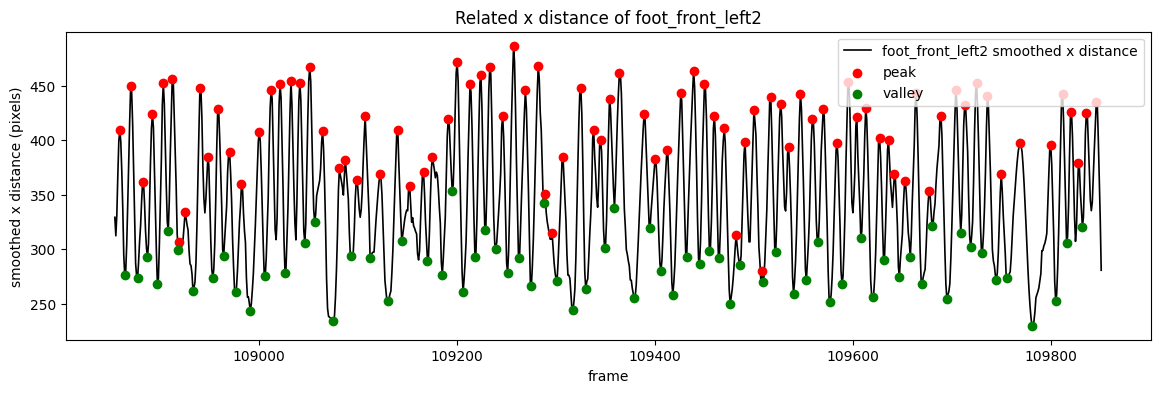

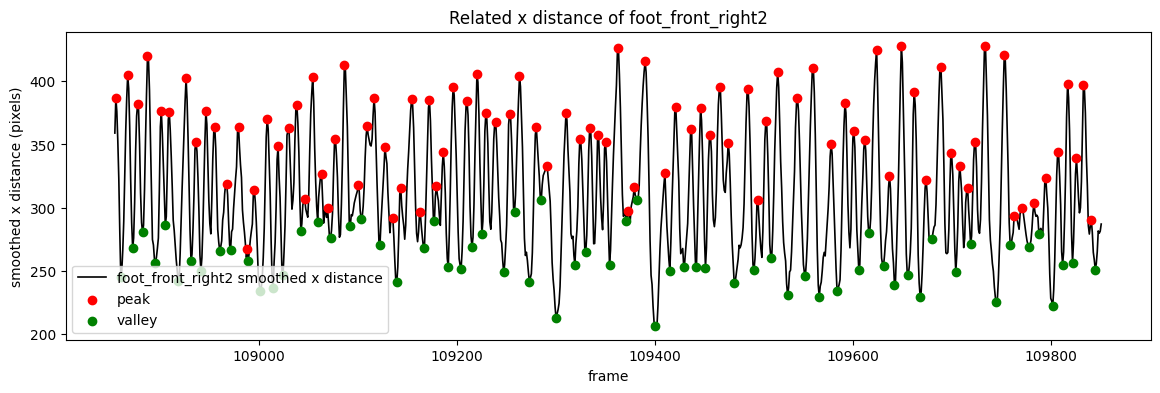

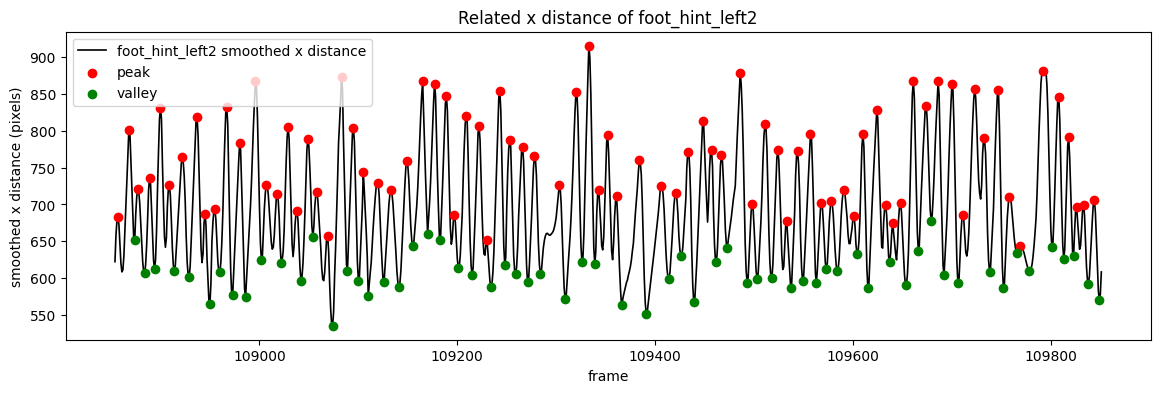

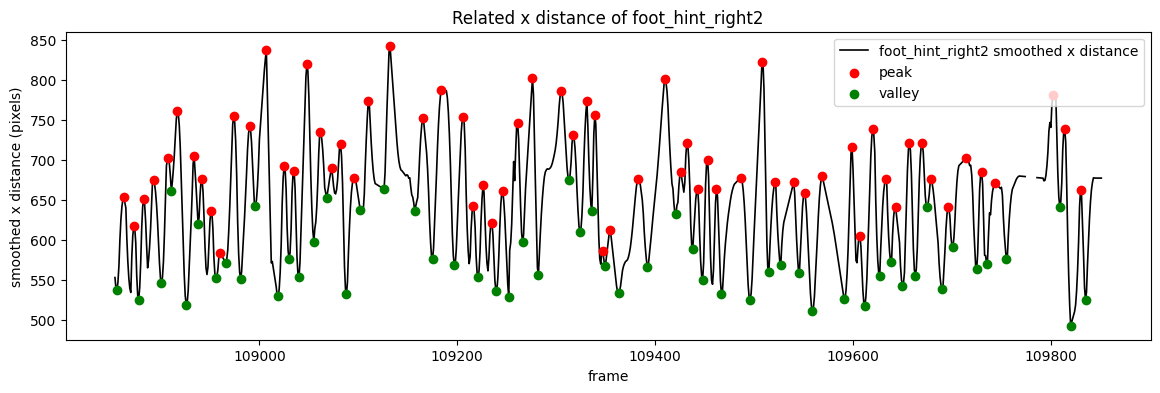

In [28]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

OUTPUT_DIR = r"G:\Acetylchonline\数据补充\3 光纤数据\Chat-cre DIO-GCaMP\Complex treadmill\20241211\2024121110\results"
INPUT_FILE = os.path.join(OUTPUT_DIR, "df_clean.csv")

window = 5

# Load cleaned data
df = pd.read_csv(INPUT_FILE, low_memory=False)
print(f"Loaded cleaned dataset: {df.shape[0]} frames × {df.shape[1]} columns")

# Identify coordinate columns
x_cols = [c for c in df.columns if c.endswith("-x")]
y_cols = [c for c in df.columns if c.endswith("-y")]

# Extract bodypart names properly (they’re between the last underscore and '-x')
bodyparts = [c.split("-")[0] for c in x_cols]
print(f"Detected {len(bodyparts)} bodyparts:")
print(bodyparts)

# Compute framewise speed and movement energy
frame_interval = 1 / 30.0          # 30 fps
target_bodyparts = ["foot_front_left2", "foot_front_right2", "foot_hint_left2", "foot_hint_right2"]

for bp in target_bodyparts:
    x_col = f"{bp}-x"
    if x_col not in df.columns or y_col not in df.columns:
        print(f"Skipping {bp}: coordinate columns missing")
        continue
    
    x = df[x_col]
    smoothed = x.rolling(window, center=True).mean()

    peaks, _   = find_peaks(smoothed, distance=5, prominence=5)
    valleys, _ = find_peaks(-smoothed, distance=10, prominence=5)

    last = slice(-1000, None)
    frames = df["frame"].to_numpy()[last]

    plt.figure(figsize=(14, 4))
    ax = plt.gca()

    # plot smoothed line
    ax.plot(frames, smoothed.to_numpy()[last],
            lw=1.2, color="k", label=f"{bp} smoothed x distance")

    # mark peaks (red) and valleys (green) only if they fall in the window
    offset = len(smoothed) - 1000
    peaks_in = [p for p in peaks   if p >= offset]
    valleys_in = [p for p in valleys if p >= offset]

    ax.scatter(df["frame"].to_numpy()[peaks_in], smoothed.to_numpy()[peaks_in], color="red", zorder=5, label="peak")
    
    ax.scatter(df["frame"].to_numpy()[valleys_in], smoothed.to_numpy()[valleys_in], color="green", zorder=5, label="valley")

    ax.set_xlabel("frame")
    ax.set_ylabel("smoothed x distance (pixels)")
    ax.set_title(f"Related x distance of {bp}")
    ax.legend()
    ax.grid(False)
    plt.show()